In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, wilcoxon
import plotly.express as px
import plotly.graph_objects as go
import nbformat

from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib_venn import venn2
import os

In [23]:
df_cell_abundance = pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_bp_res_mid_lvl_ct_ct_fraction.csv")
df_cell_abundance['dcc_filename'] = df_cell_abundance['dcc_filename'].str.replace('-', '.', regex=False)
df_cell_abundance.head(3)

,dcc_filename,tumor,Tcells,Bcells,Fibroblasts,NKcells,Macrophages,Mast cells,DCs,other,Endothelial cells,Roi,Segment,Sample,NACT_status,Annotation_cell,Roi.1,Segment_geomx,Patient,Site
0,DSP.1001660016606.G.A02.dcc,0.476461,0.009487,0.135361,0.231508,0.018543,0.101739,0.001637,0.014749,NaN,0.010419,1,stroma,S053_post,post,posCD8_posIBA1,1.0,tsi,S053,Omentum
1,DSP.1001660016606.G.A03.dcc,0.806981,0.013774,0.026948,0.064725,0.012740,0.055951,0.001264,0.009905,NaN,0.007552,1,tumor,S053_post,post,posCD8_posIBA1,1.0,tsi,S053,Omentum
2,DSP.1001660016606.G.A04.dcc,0.427201,0.009367,0.105530,0.250796,0.012980,0.169353,NaN,0.018545,NaN,0.005558,2,stroma,S053_post,post,posCD8_posIBA1,2.0,tsi,S053,Omentum


In [24]:
stromal_gene_expression=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_geomx_harmony_corr_expr_transpose.csv")


In [3]:
fibr_gene_expression_modified=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/filtered_fibroblasts_gene_exp_transposed_w_clinical.csv")
fibr_gene_expression_modified['dcc_filename'] = fibr_gene_expression_modified['dcc_filename'].str.replace('-', '.', regex=False)

In [25]:
stromal_gene_expression = stromal_gene_expression.merge(df_cell_abundance[['dcc_filename', 'Segment','Sample']], on='dcc_filename', how='left')
stromal_gene_expression

,dcc_filename,A2M,ACADM,ACADS,ACAT1,ACVRL1,PSEN1,ADA,SGCA,ADRB2,...,SPATA21,SYCP2L,FGF10,IL3,IL5,MBL2,ARG1,CCL7,Segment,Sample
0,DSP.1001660016606.G.A02.dcc,6.804666,3.813770,3.094522,3.164409,3.379704,4.040574,2.899794,3.971268,1.660338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma,S053_post
1,DSP.1001660016606.G.A03.dcc,6.260479,4.098920,2.754026,3.695262,3.204526,4.713780,2.037078,3.807079,1.459433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,S053_post
2,DSP.1001660016606.G.A04.dcc,6.558231,3.995816,3.354820,3.765523,2.918882,3.908741,3.160093,3.933863,2.369323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma,S053_post
3,DSP.1001660016606.G.A05.dcc,6.372312,3.182476,2.866057,3.848748,1.562825,4.439850,2.001105,4.093993,1.666247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,S053_post
4,DSP.1001660016606.G.A06.dcc,7.417367,3.226799,2.810282,4.366523,3.352077,3.631273,2.465758,3.329628,1.619624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stroma,S053_post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,DSP.1001660037247.C.D02.dcc,8.166184,5.241664,3.124489,3.526732,3.990766,4.529707,2.097933,3.164388,2.191627,...,1.303624,4.220623,3.404106,1.639313,0.528117,1.784708,1.268932,1.171722,stroma,S333_pOme
500,DSP.1001660037247.C.D03.dcc,6.376363,5.552360,2.214444,5.236922,3.291828,5.162804,1.452677,2.908834,0.359455,...,1.971167,2.171534,1.837595,0.993433,2.067794,3.294537,0.338434,0.994699,tumor,S333_pOme
501,DSP.1001660037247.C.D04.dcc,5.965432,4.531758,3.336801,4.182140,4.394296,2.165280,3.052810,0.851340,2.393427,...,1.463408,2.607464,3.337978,2.273930,4.099109,1.475635,1.923790,1.826580,stroma,S333_pOme
502,DSP.1001660037247.C.D05.dcc,4.274683,4.829125,4.450223,5.702187,2.662740,5.174575,2.488751,3.088751,0.339813,...,2.905090,1.682048,2.462543,2.462948,0.763774,0.365711,2.561423,0.535245,tumor,S333_pOme


In [26]:
tumor_gene_expression=stromal_gene_expression.loc[stromal_gene_expression['Segment']=="tumor"]
stromal_gene_expression=stromal_gene_expression.loc[stromal_gene_expression['Segment']=="stroma"]
tumor_gene_expression

,dcc_filename,A2M,ACADM,ACADS,ACAT1,ACVRL1,PSEN1,ADA,SGCA,ADRB2,...,SPATA21,SYCP2L,FGF10,IL3,IL5,MBL2,ARG1,CCL7,Segment,Sample
1,DSP.1001660016606.G.A03.dcc,6.260479,4.098920,2.754026,3.695262,3.204526,4.713780,2.037078,3.807079,1.459433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,S053_post
3,DSP.1001660016606.G.A05.dcc,6.372312,3.182476,2.866057,3.848748,1.562825,4.439850,2.001105,4.093993,1.666247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,S053_post
5,DSP.1001660016606.G.A07.dcc,4.270724,4.191617,2.438553,3.964941,1.450099,3.832948,3.422043,2.361022,2.032790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,S053_post
7,DSP.1001660016606.G.A09.dcc,5.700569,3.450182,3.066636,3.738675,1.849683,3.785764,2.118696,3.445232,2.202347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,S053_post
9,DSP.1001660016606.G.A11.dcc,4.994710,3.856643,2.890848,4.602470,1.124861,4.515451,2.696120,2.854496,0.711536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,S053_post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,DSP.1001660037247.C.C09.dcc,5.301583,5.577581,3.213030,3.998505,1.971948,5.093898,2.909434,3.403965,2.626625,...,1.982937,2.633807,2.080726,2.507128,1.319551,1.995164,1.450021,2.082397,tumor,S333_pOme
496,DSP.1001660037247.C.C11.dcc,5.627609,5.353561,4.453114,4.823058,3.045114,4.346046,2.344090,2.940557,1.354566,...,0.972823,2.317645,3.383835,1.621967,2.213905,0.620824,1.333544,1.985376,tumor,S333_pOme
497,DSP.1001660037247.C.C12.dcc,6.167466,5.530541,2.268609,4.883731,3.632745,5.426152,1.788226,2.308508,0.930296,...,2.071589,0.960271,2.716666,1.762423,2.655790,1.536566,1.296610,0.812064,tumor,S333_pOme
500,DSP.1001660037247.C.D03.dcc,6.376363,5.552360,2.214444,5.236922,3.291828,5.162804,1.452677,2.908834,0.359455,...,1.971167,2.171534,1.837595,0.993433,2.067794,3.294537,0.338434,0.994699,tumor,S333_pOme


Stromal stuff: bubble plots of immune cell abundance versus genes of interest expression

In [142]:
genes_of_interest_target=["FAP","PDGFRB",'PDGFRA', 'S100A4', "LRRC15","IL1R1","IL1R2"]

all_genes_heatmap = stromal_gene_expression.groupby("Sample")[genes_of_interest_target].mean()

In [143]:
# Filter once for stroma
df_stroma = df_cell_abundance[df_cell_abundance["Segment"] == "stroma"]

# Group and calculate mean cell abundance per sample
df_tcell_abundance_mean       = df_stroma.groupby("Sample")["Tcells"].mean()
df_bcell_abundance_mean       = df_stroma.groupby("Sample")["Bcells"].mean()
df_nkcell_abundance_mean      = df_stroma.groupby("Sample")["NKcells"].mean()
df_macrophages_abundance_mean = df_stroma.groupby("Sample")["Macrophages"].mean()
df_mast_abundance_mean        = df_stroma.groupby("Sample")["Mast cells"].mean()
df_dcs_abundance_mean         = df_stroma.groupby("Sample")["DCs"].mean()
df_fibroblasts_abundance_mean = df_stroma.groupby("Sample")["Fibroblasts"].mean()




In [144]:
merged_df_tcell=pd.merge(df_tcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_tcell["Sample"]=merged_df_tcell.index
merged_df_bcell=pd.merge(df_bcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_bcell["Sample"]=merged_df_bcell.index
merged_df_nkcell=pd.merge(df_nkcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_nkcell["Sample"]=merged_df_nkcell.index
merged_df_macrophages=pd.merge(df_macrophages_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_macrophages["Sample"]=merged_df_macrophages.index
merged_df_mast=pd.merge(df_mast_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_mast["Sample"]=merged_df_mast.index
merged_df_dcs=pd.merge(df_dcs_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_dcs["Sample"]=merged_df_dcs.index
merged_df_fibroblasts=pd.merge(df_fibroblasts_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_fibroblasts["Sample"]=merged_df_fibroblasts.index

In [146]:
# Only select numeric data
numeric_df = merged_df_tcell.select_dtypes(include='number')

# Find overall min and max values
overall_min = numeric_df.min().min()
overall_max = numeric_df.max().max()

print(f"Minimum value: {overall_min}")
print(f"Maximum value: {overall_max}")


Minimum value: 0.0144639085302191
Maximum value: 7.898361876392895


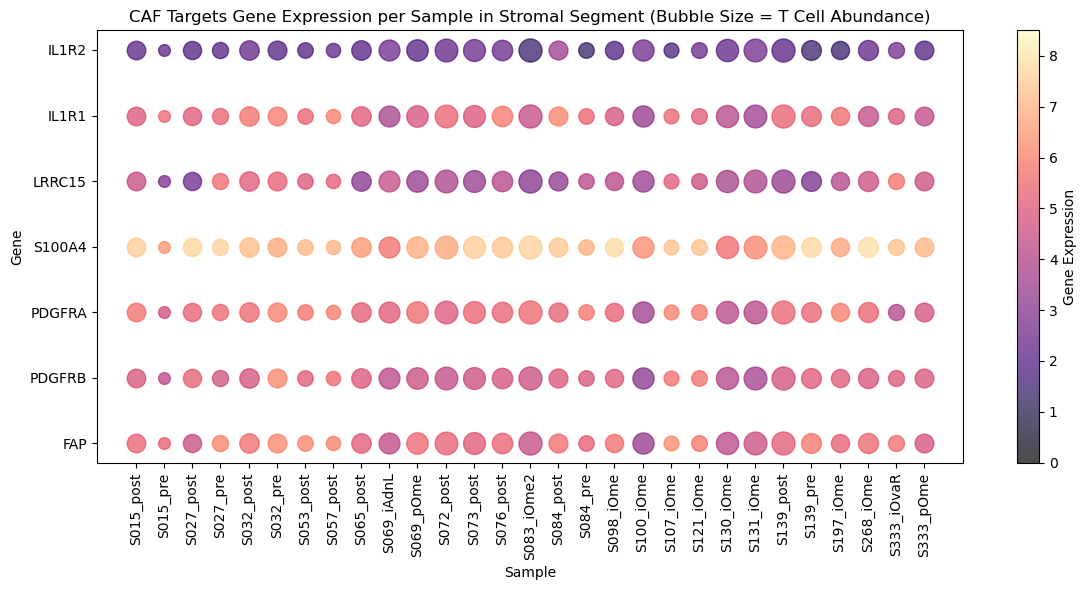

In [149]:
plt.figure(figsize=(12, 6))
merged_df_tcell = merged_df_tcell.dropna()
# Get coordinates for x (samples) and y (genes)
x_vals = merged_df_tcell['Sample']
samples = merged_df_tcell['Sample'].unique()
genes = genes_of_interest_target

# Loop through genes to plot all combinations
for gene in genes:
    for i, sample in enumerate(samples):
        expression = merged_df_tcell.loc[merged_df_tcell['Sample'] == sample, gene].values[0]
        t_cells = merged_df_tcell.loc[merged_df_tcell['Sample'] == sample, 'Tcells'].values[0]
        #print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, T Cells: {t_cells}")
        plt.scatter(
            x=sample,
            y=gene,
            s=t_cells * 5000,  # scale bubble size as needed
            c=expression,
            cmap='magma',
            vmin=0,  # consistent color scale
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stromal Segment (Bubble Size = T Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

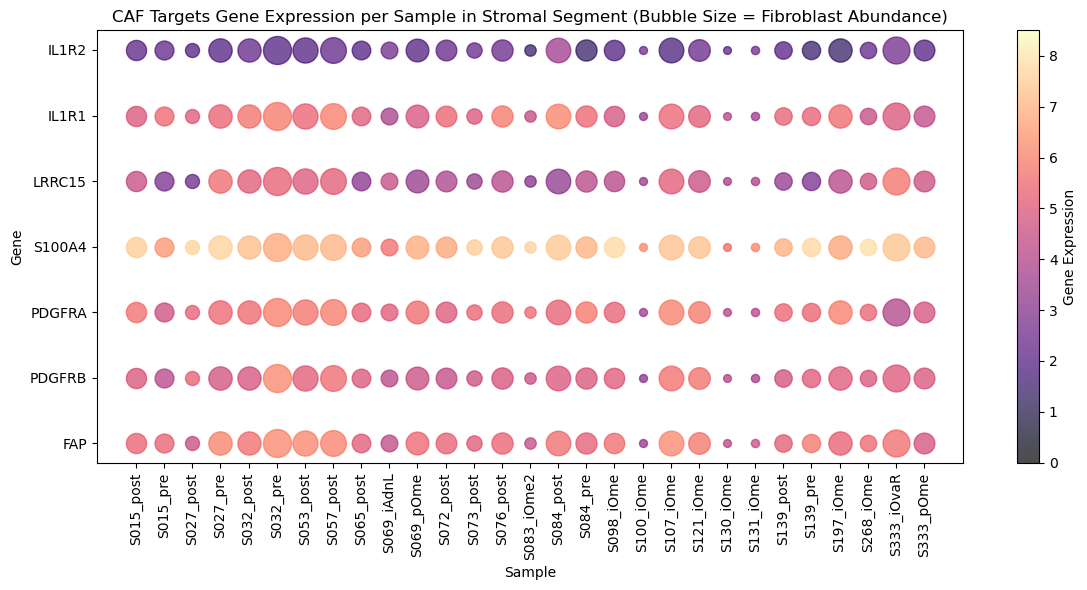

In [150]:

plt.figure(figsize=(12, 6))

# Drop rows with any NaN in relevant columns
merged_df_fibroblasts = merged_df_fibroblasts.dropna(subset=['Sample', 'Fibroblasts'] + genes_of_interest_target)

# Get unique sample names and gene list
samples = merged_df_fibroblasts['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        expression = merged_df_fibroblasts.loc[merged_df_fibroblasts['Sample'] == sample, gene].values[0]
        fibroblasts = merged_df_fibroblasts.loc[merged_df_fibroblasts['Sample'] == sample, 'Fibroblasts'].values[0]
        
        plt.scatter(
            x=sample,
            y=gene,
            s=fibroblasts * 1300,  # adjust scale as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stromal Segment (Bubble Size = Fibroblast Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


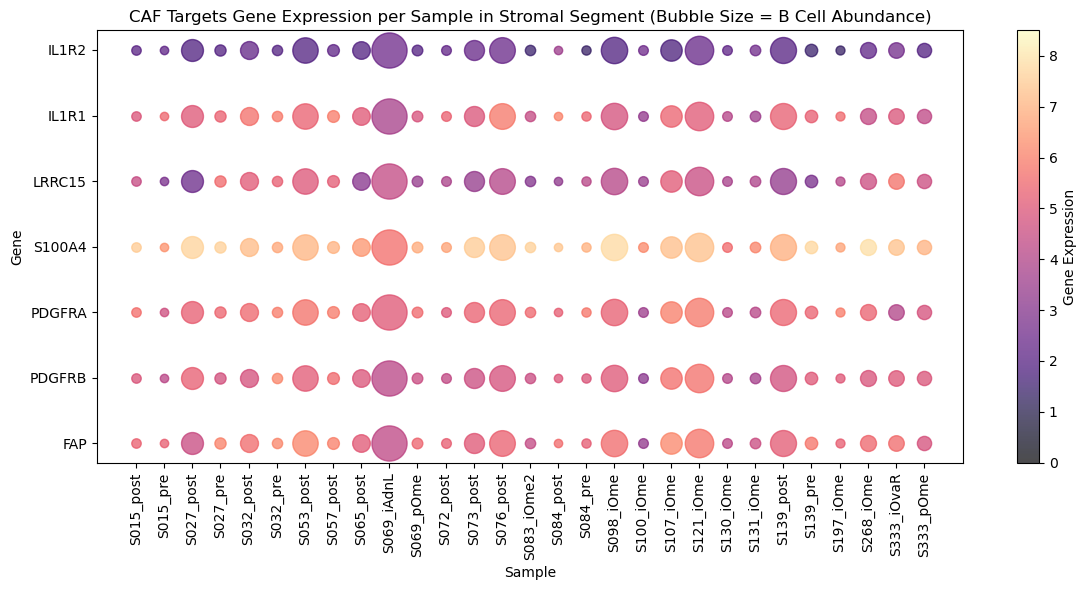

In [151]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in Bcells column
cols_to_check = ['Sample', 'Bcells'] + genes_of_interest_target
merged_df_bcell = merged_df_bcell.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_bcell['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_bcell.loc[merged_df_bcell['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        b_cells = row['Bcells'].values[0]

        plt.scatter(
            x=sample,
            y=gene,
            s=b_cells * 5500,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stromal Segment (Bubble Size = B Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

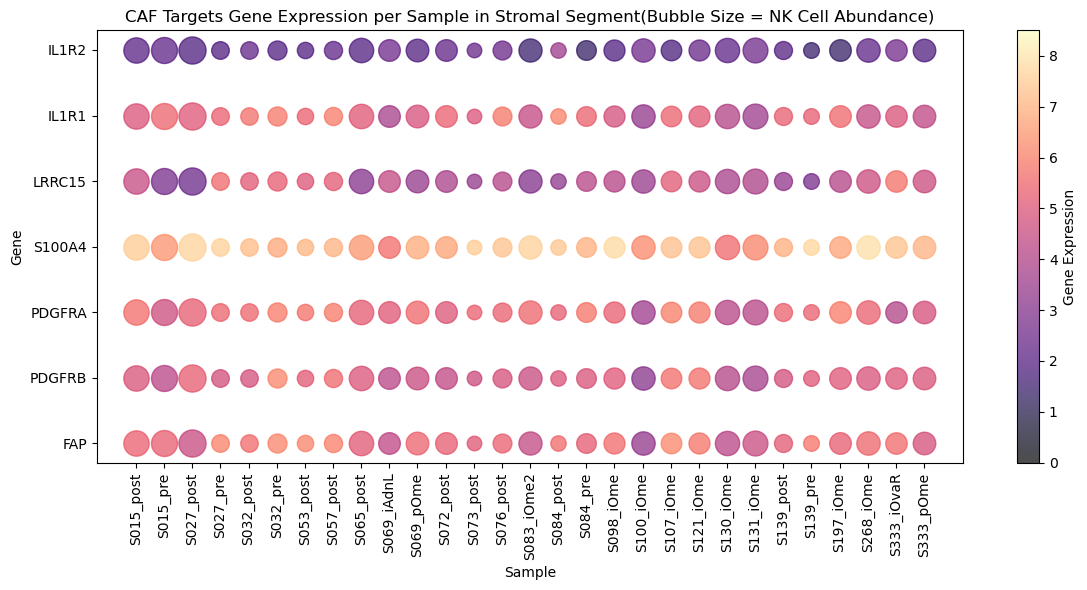

In [152]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in NKcells column
cols_to_check = ['Sample', 'NKcells'] + genes_of_interest_target
merged_df_nkcell = merged_df_nkcell.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_nkcell['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_nkcell.loc[merged_df_nkcell['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        nk_cells = row['NKcells'].values[0]

        #print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, NK Cells: {nk_cells}")

        plt.scatter(
            x=sample,
            y=gene,
            s=nk_cells * 8000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stromal Segment(Bubble Size = NK Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


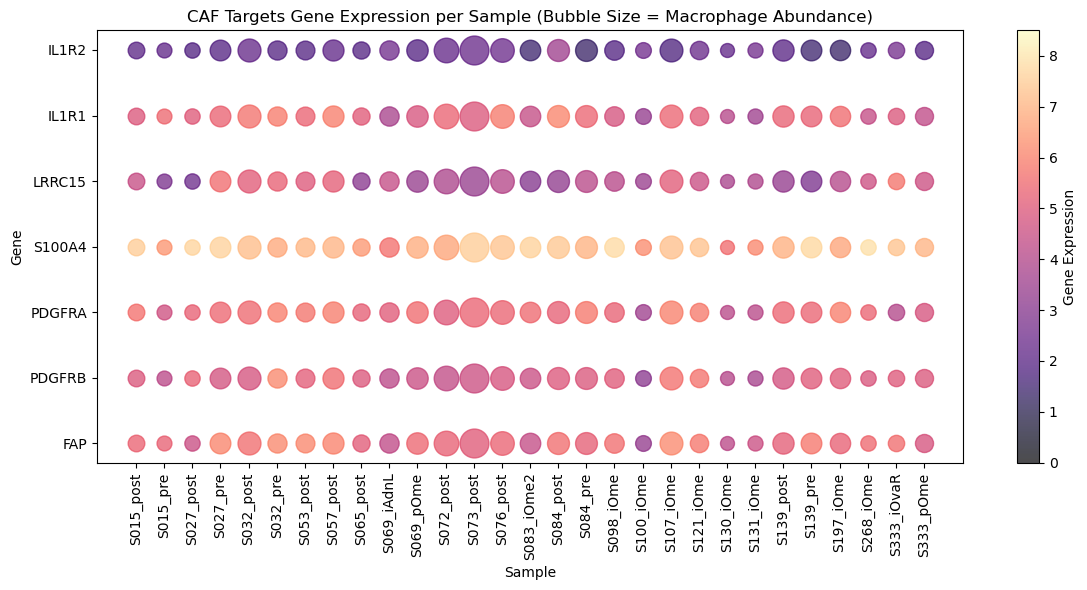

In [ ]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in Macrophages column
cols_to_check = ['Sample', 'Macrophages'] + genes_of_interest_target
merged_df_macrophages = merged_df_macrophages.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_macrophages['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_macrophages.loc[merged_df_macrophages['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        macrophages = row['Macrophages'].values[0]

        plt.scatter(
            x=sample,
            y=gene,
            s=macrophages * 1300,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stromal Segment (Bubble Size = Macrophage Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


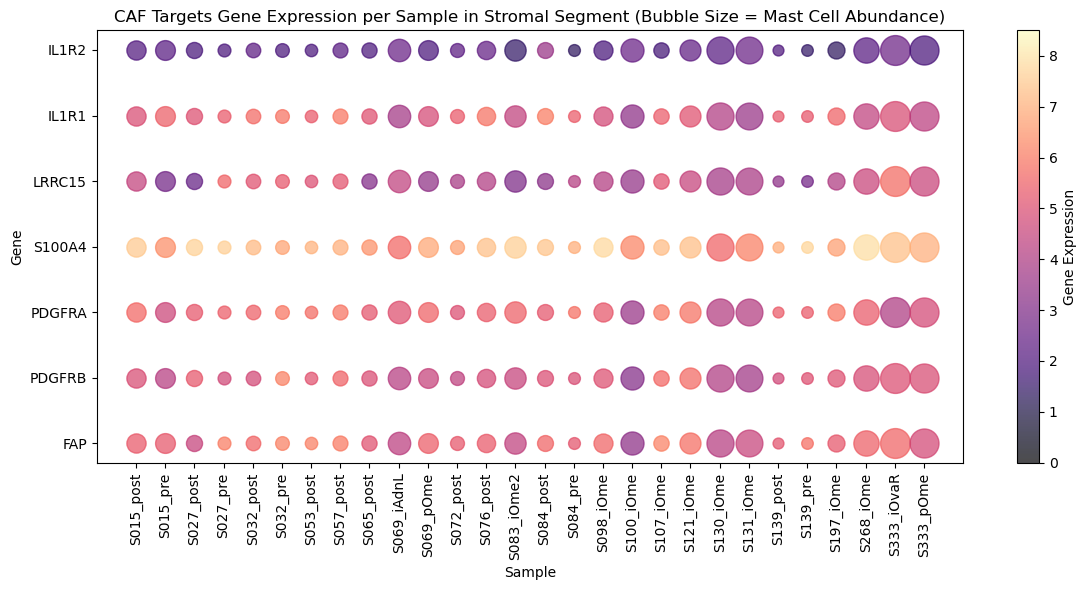

In [154]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in Mast column
cols_to_check = ['Sample', 'Mast cells'] + genes_of_interest_target
merged_df_mast = merged_df_mast.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_mast['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_mast.loc[merged_df_mast['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        mast_cells = row['Mast cells'].values[0]

        plt.scatter(
            x=sample,
            y=gene,
            s=mast_cells * 80000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stromal Segment (Bubble Size = Mast Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

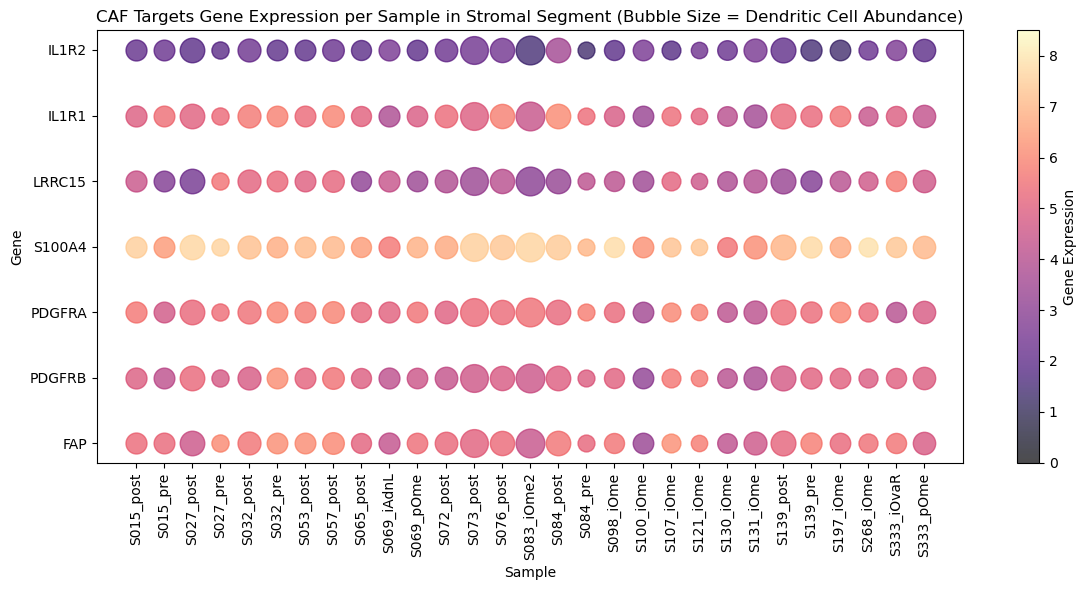

In [155]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in DCs column
cols_to_check = ['Sample', 'DCs'] + genes_of_interest_target
merged_df_dcs = merged_df_dcs.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_dcs['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_dcs.loc[merged_df_dcs['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        dcs = row['DCs'].values[0]
        plt.scatter(
            x=sample,
            y=gene,
            s=dcs * 8000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stromal Segment (Bubble Size = Dendritic Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


Tumor stuff 

In [111]:
genes_of_interest_target=["FAP","PDGFRB",'PDGFRA', 'S100A4', "LRRC15","IL1R1","IL1R2"]

all_genes_heatmap = tumor_gene_expression.groupby("Sample")[genes_of_interest_target].mean()

In [112]:
# Filter once for stroma
df_stroma = df_cell_abundance[df_cell_abundance["Segment"] == "tumor"]

# Group and calculate mean cell abundance per sample
df_tcell_abundance_mean       = df_stroma.groupby("Sample")["Tcells"].mean()
df_bcell_abundance_mean       = df_stroma.groupby("Sample")["Bcells"].mean()
df_nkcell_abundance_mean      = df_stroma.groupby("Sample")["NKcells"].mean()
df_macrophages_abundance_mean = df_stroma.groupby("Sample")["Macrophages"].mean()
df_mast_abundance_mean        = df_stroma.groupby("Sample")["Mast cells"].mean()
df_dcs_abundance_mean         = df_stroma.groupby("Sample")["DCs"].mean()
df_fibroblasts_abundance_mean = df_stroma.groupby("Sample")["Fibroblasts"].mean()

In [113]:
merged_df_tcell=pd.merge(df_tcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_tcell["Sample"]=merged_df_tcell.index
merged_df_bcell=pd.merge(df_bcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_bcell["Sample"]=merged_df_bcell.index
merged_df_nkcell=pd.merge(df_nkcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_nkcell["Sample"]=merged_df_nkcell.index
merged_df_macrophages=pd.merge(df_macrophages_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_macrophages["Sample"]=merged_df_macrophages.index
merged_df_mast=pd.merge(df_mast_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_mast["Sample"]=merged_df_mast.index
merged_df_dcs=pd.merge(df_dcs_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_dcs["Sample"]=merged_df_dcs.index
merged_df_fibroblasts=pd.merge(df_fibroblasts_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_fibroblasts["Sample"]=merged_df_fibroblasts.index

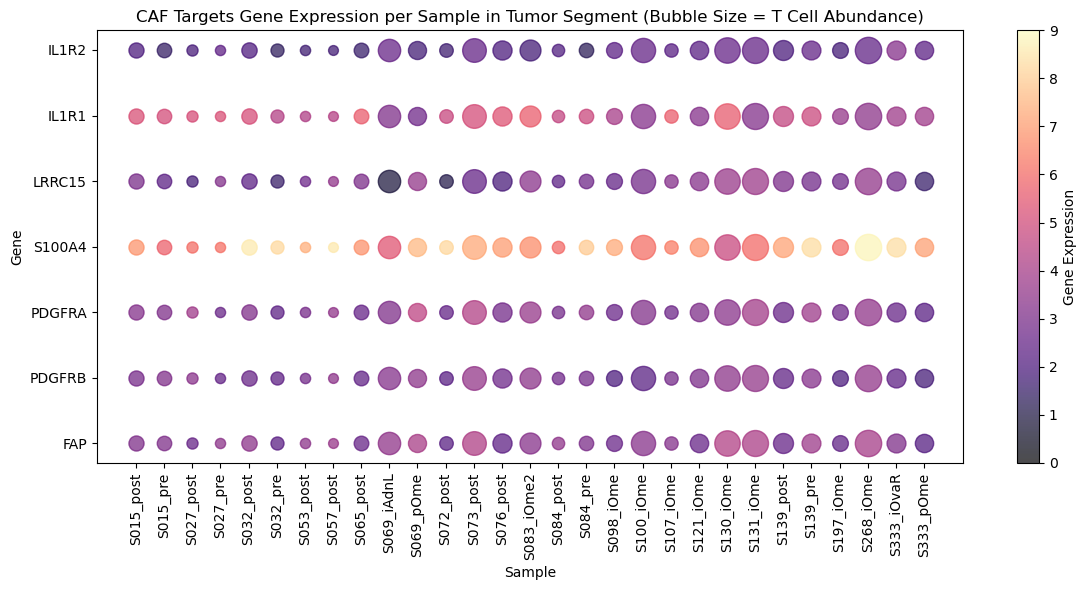

In [118]:
plt.figure(figsize=(12, 6))
merged_df_tcell = merged_df_tcell.dropna()
# Get coordinates for x (samples) and y (genes)
x_vals = merged_df_tcell['Sample']
samples = merged_df_tcell['Sample'].unique()
genes = genes_of_interest_target

# Loop through genes to plot all combinations
for gene in genes:
    for i, sample in enumerate(samples):
        expression = merged_df_tcell.loc[merged_df_tcell['Sample'] == sample, gene].values[0]
        t_cells = merged_df_tcell.loc[merged_df_tcell['Sample'] == sample, 'Tcells'].values[0]
        #print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, T Cells: {t_cells}")
        plt.scatter(
            x=sample,
            y=gene,
            s=t_cells * 7500,  # scale bubble size as needed
            c=expression,
            cmap='magma',
            vmin=0,  # consistent color scale
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = T Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

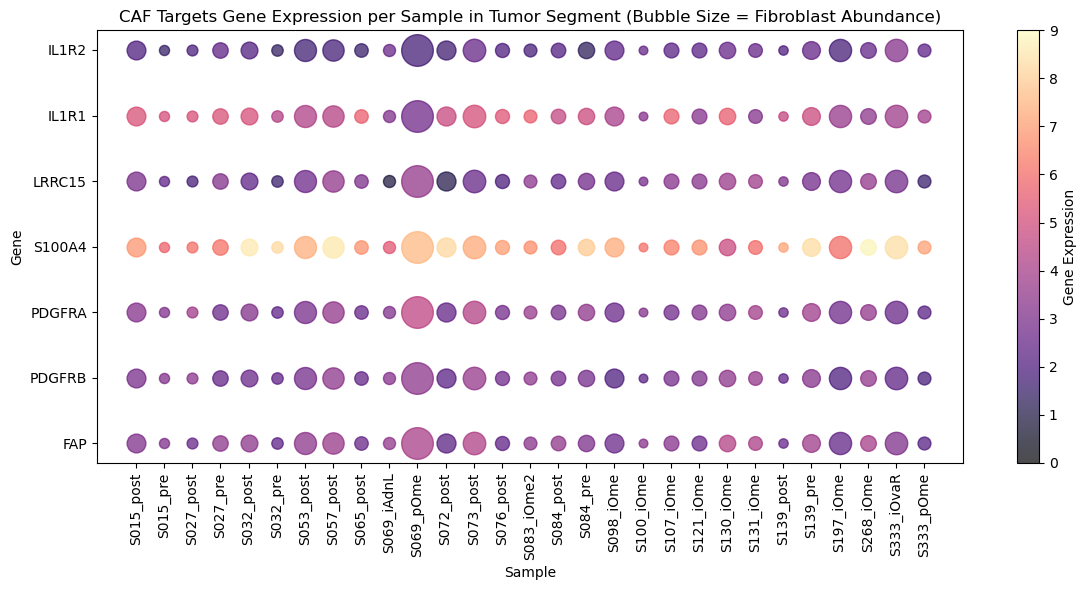

In [120]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in relevant columns
merged_df_fibroblasts = merged_df_fibroblasts.dropna(subset=['Sample', 'Fibroblasts'] + genes_of_interest_target)

# Get unique sample names and gene list
samples = merged_df_fibroblasts['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        expression = merged_df_fibroblasts.loc[merged_df_fibroblasts['Sample'] == sample, gene].values[0]
        fibroblasts = merged_df_fibroblasts.loc[merged_df_fibroblasts['Sample'] == sample, 'Fibroblasts'].values[0]
        plt.scatter(
            x=sample,
            y=gene,
            s=fibroblasts * 8000,  # adjust scale as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = Fibroblast Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

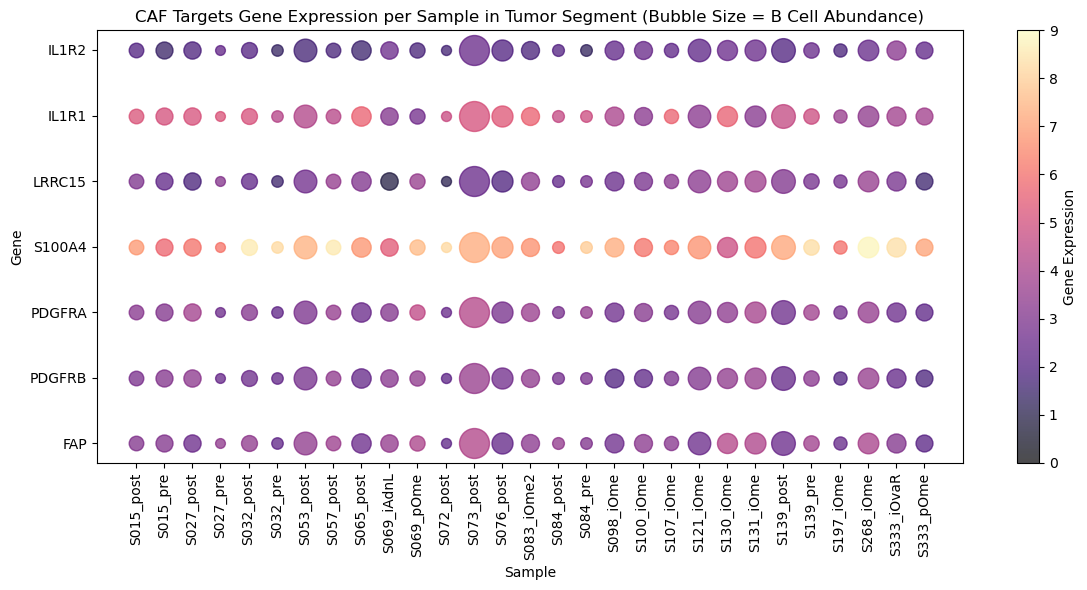

In [129]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in Bcells column
cols_to_check = ['Sample', 'Bcells'] + genes_of_interest_target
merged_df_bcell = merged_df_bcell.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_bcell['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_bcell.loc[merged_df_bcell['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        b_cells = row['Bcells'].values[0]

        plt.scatter(
            x=sample,
            y=gene,
            s=b_cells * 25000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = B Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

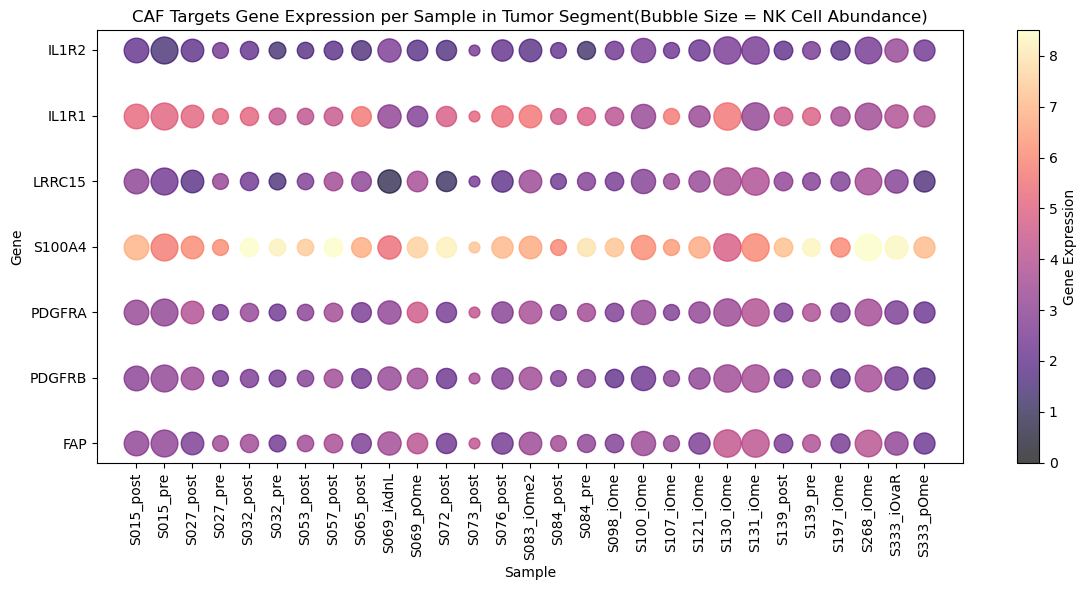

In [131]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in NKcells column
cols_to_check = ['Sample', 'NKcells'] + genes_of_interest_target
merged_df_nkcell = merged_df_nkcell.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_nkcell['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_nkcell.loc[merged_df_nkcell['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        nk_cells = row['NKcells'].values[0]

        #print(f"Sample: {sample}, Gene: {gene}, Expression: {expression}, NK Cells: {nk_cells}")

        plt.scatter(
            x=sample,
            y=gene,
            s=nk_cells * 10000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment(Bubble Size = NK Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

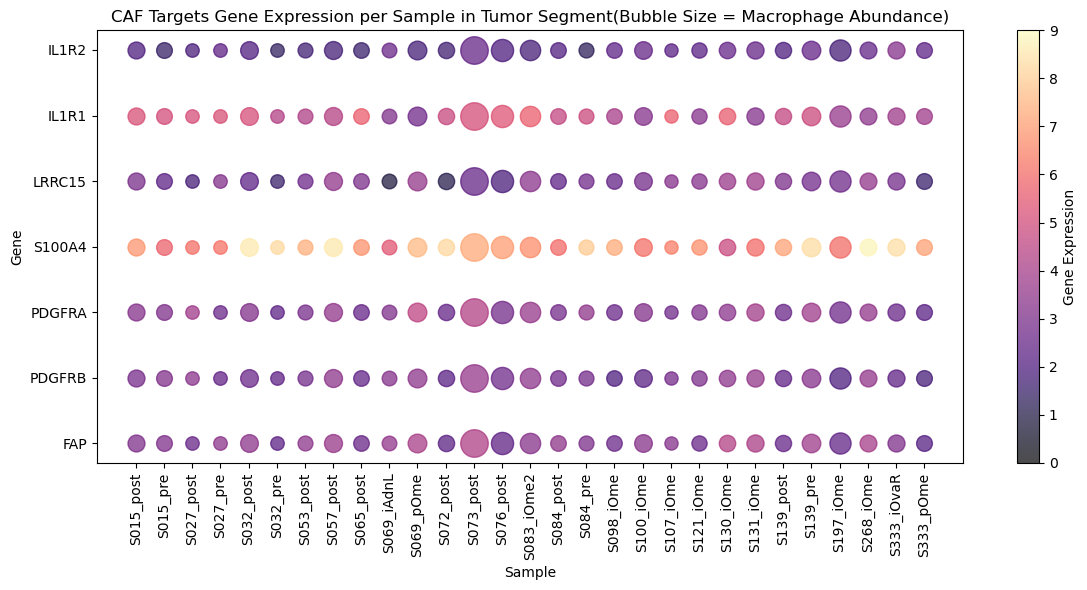

In [136]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in Macrophages column
cols_to_check = ['Sample', 'Macrophages'] + genes_of_interest_target
merged_df_macrophages = merged_df_macrophages.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_macrophages['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_macrophages.loc[merged_df_macrophages['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        macrophages = row['Macrophages'].values[0]

        plt.scatter(
            x=sample,
            y=gene,
            s=macrophages * 2200,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment(Bubble Size = Macrophage Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

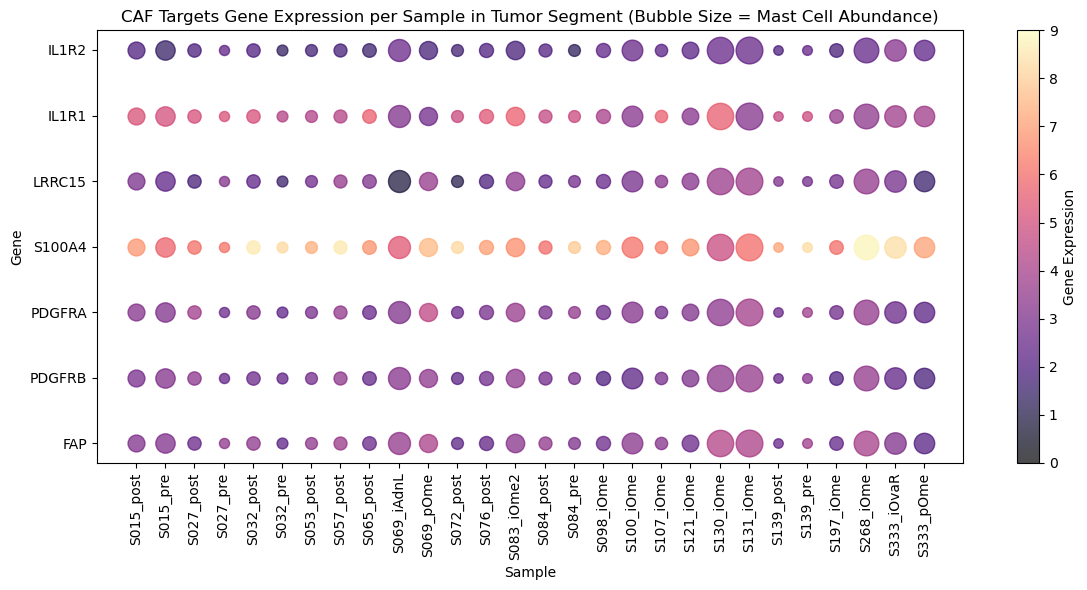

In [138]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in Mast column
cols_to_check = ['Sample', 'Mast cells'] + genes_of_interest_target
merged_df_mast = merged_df_mast.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_mast['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_mast.loc[merged_df_mast['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        mast_cells = row['Mast cells'].values[0]

        plt.scatter(
            x=sample,
            y=gene,
            s=mast_cells * 80000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = Mast Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

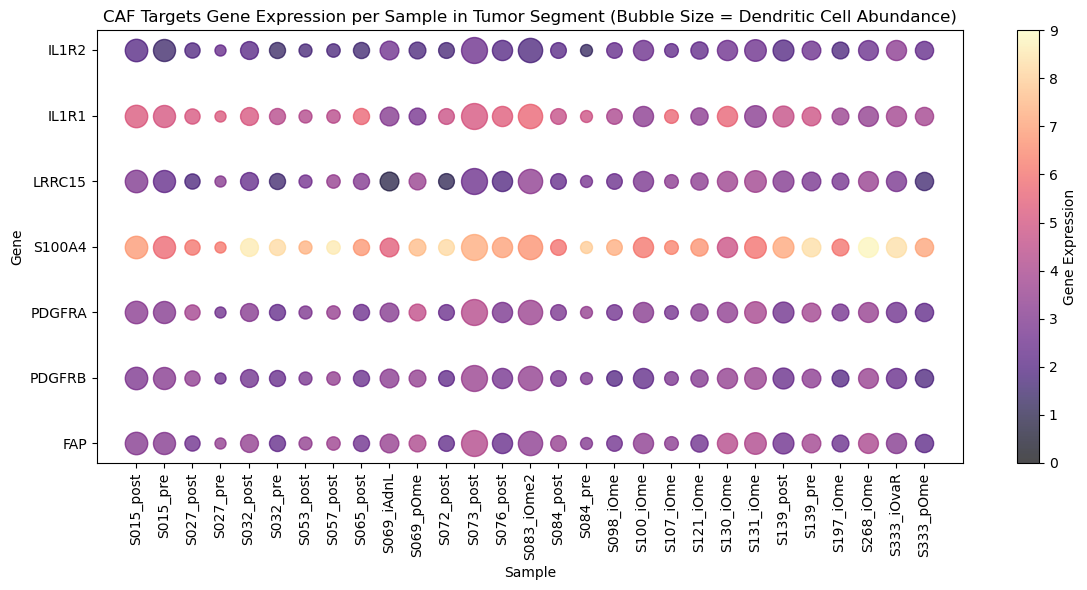

In [141]:
plt.figure(figsize=(12, 6))

# Drop rows with any NaN in genes of interest or in DCs column
cols_to_check = ['Sample', 'DCs'] + genes_of_interest_target
merged_df_dcs = merged_df_dcs.dropna(subset=cols_to_check)

# Get unique sample names and gene list
samples = merged_df_dcs['Sample'].unique()
genes = genes_of_interest_target

# Plotting
for gene in genes:
    for sample in samples:
        row = merged_df_dcs.loc[merged_df_dcs['Sample'] == sample]

        if row.empty:
            continue  # skip if sample-gene pair missing

        expression = row[gene].values[0]
        dcs = row['DCs'].values[0]
        plt.scatter(
            x=sample,
            y=gene,
            s=dcs * 9000,  # adjust scale factor as needed
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = Dendritic Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

In [123]:
# Only select numeric data
numeric_df = merged_df_tcell.select_dtypes(include='number')

# Find overall min and max values
overall_min = numeric_df.min().min()
overall_max = numeric_df.max().max()

print(f"Minimum value: {overall_min}")
print(f"Maximum value: {overall_max}")

Minimum value: 0.00669501418768396
Maximum value: 8.789482323726125
